In [1]:
import numpy as np
np.random.seed(888)

In [2]:
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import model_to_dot
from keras.callbacks.callbacks import EarlyStopping

Using TensorFlow backend.


## Read train, valid, test data set

In [3]:
train_data = np.load("data/train_data.npy")
train_label = np.load("data/train_label.npy")

valid_data = np.load("data/valid_data.npy")
valid_label = np.load("data/valid_label.npy")

test_data = np.load("data/test_data.npy")
test_label = np.load("data/test_label.npy")

In [4]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


## Neural Network 1

In [5]:
model_1 = Sequential()
model_1.add(Dense(4, input_shape=(2304,)))
model_1.add(Activation('softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

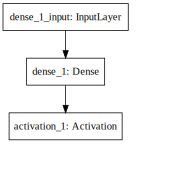

In [6]:
SVG(model_to_dot(model_1).create(prog='dot', format='svg'))

In [7]:
history_1 = model_1.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 1000, 
                        shuffle = True)

Train on 105697 samples, validate on 13213 samples
Epoch 1/50
105697/105697 [==============================] - 3s 26us/step - loss: 1.2021 - accuracy: 0.5007 - val_loss: 1.0877 - val_accuracy: 0.5514
Epoch 2/50
105697/105697 [==============================] - 1s 10us/step - loss: 1.0514 - accuracy: 0.5562 - val_loss: 1.0185 - val_accuracy: 0.5657
Epoch 3/50
105697/105697 [==============================] - 1s 11us/step - loss: 1.0085 - accuracy: 0.5657 - val_loss: 0.9930 - val_accuracy: 0.5703
Epoch 4/50
105697/105697 [==============================] - 1s 7us/step - loss: 0.9896 - accuracy: 0.5706 - val_loss: 0.9799 - val_accuracy: 0.5735
Epoch 5/50
105697/105697 [==============================] - 1s 8us/step - loss: 0.9792 - accuracy: 0.5748 - val_loss: 0.9726 - val_accuracy: 0.5782
Epoch 6/50
105697/105697 [==============================] - 1s 8us/step - loss: 0.9723 - accuracy: 0.5783 - val_loss: 0.9677 - val_accuracy: 0.5795
Epoch 7/50
105697/105697 [==============================] 

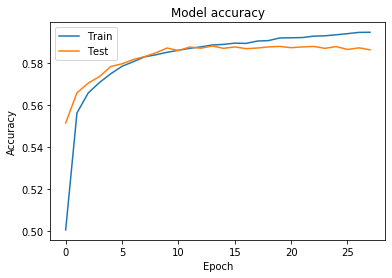

In [8]:
# Plot training & validation accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

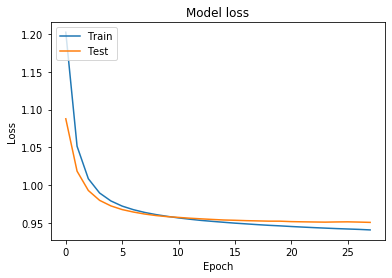

In [9]:
# Plot training & validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural Network 2

In [10]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape=(2304,), activation='tanh'))
model_2.add(Dense(4))
model_2.add(Activation('softmax'))
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

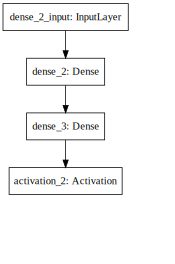

In [11]:
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))

In [12]:
history_2 = model_2.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 1000, 
                        shuffle = True)

Train on 105697 samples, validate on 13213 samples
Epoch 1/50
105697/105697 [==============================] - 2s 23us/step - loss: 1.0179 - accuracy: 0.5556 - val_loss: 0.9602 - val_accuracy: 0.5847
Epoch 2/50
105697/105697 [==============================] - 2s 23us/step - loss: 0.9586 - accuracy: 0.5844 - val_loss: 0.9540 - val_accuracy: 0.5878
Epoch 3/50
105697/105697 [==============================] - 2s 21us/step - loss: 0.9499 - accuracy: 0.5887 - val_loss: 0.9535 - val_accuracy: 0.5852
Epoch 4/50
105697/105697 [==============================] - 2s 21us/step - loss: 0.9458 - accuracy: 0.5910 - val_loss: 0.9529 - val_accuracy: 0.5840
Epoch 5/50
105697/105697 [==============================] - 2s 21us/step - loss: 0.9417 - accuracy: 0.5937 - val_loss: 0.9517 - val_accuracy: 0.5868
Epoch 6/50
105697/105697 [==============================] - 2s 22us/step - loss: 0.9396 - accuracy: 0.5949 - val_loss: 0.9543 - val_accuracy: 0.5869
Epoch 7/50
105697/105697 [=============================

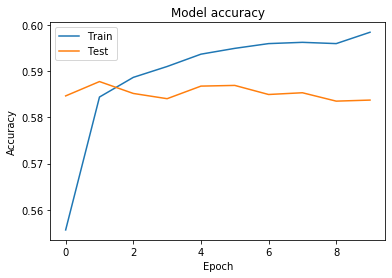

In [13]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

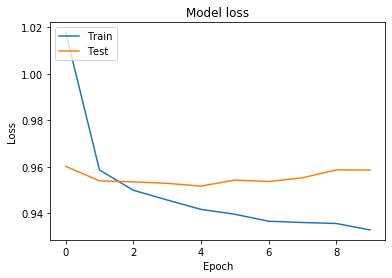

In [14]:
# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural Network 3

In [15]:
model_3 = Sequential()
model_3.add(Dense(128, input_shape=(2304,), activation='tanh'))
model_3.add(Dropout(0.5))
model_3.add(Dense(4))
model_3.add(Activation('softmax'))
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

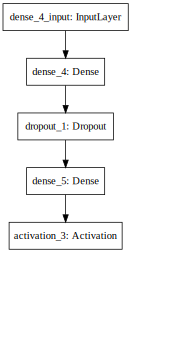

In [16]:
SVG(model_to_dot(model_3).create(prog='dot', format='svg'))

In [17]:
history_3 = model_3.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 1000, 
                        shuffle = True)

Train on 105697 samples, validate on 13213 samples
Epoch 1/50
105697/105697 [==============================] - 3s 28us/step - loss: 1.0260 - accuracy: 0.5545 - val_loss: 0.9615 - val_accuracy: 0.5822
Epoch 2/50
105697/105697 [==============================] - 2s 20us/step - loss: 0.9690 - accuracy: 0.5800 - val_loss: 0.9560 - val_accuracy: 0.5861
Epoch 3/50
105697/105697 [==============================] - 2s 20us/step - loss: 0.9605 - accuracy: 0.5842 - val_loss: 0.9536 - val_accuracy: 0.5859
Epoch 4/50
105697/105697 [==============================] - 2s 20us/step - loss: 0.9559 - accuracy: 0.5876 - val_loss: 0.9525 - val_accuracy: 0.5868
Epoch 5/50
105697/105697 [==============================] - 2s 20us/step - loss: 0.9529 - accuracy: 0.5901 - val_loss: 0.9516 - val_accuracy: 0.5861
Epoch 6/50
105697/105697 [==============================] - 2s 21us/step - loss: 0.9509 - accuracy: 0.5895 - val_loss: 0.9513 - val_accuracy: 0.5860
Epoch 7/50
105697/105697 [=============================

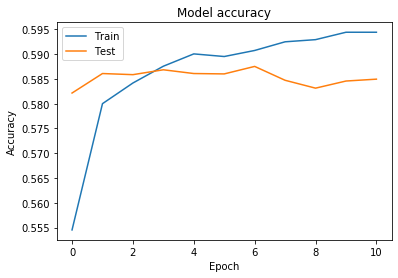

In [18]:
# Plot training & validation accuracy values
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

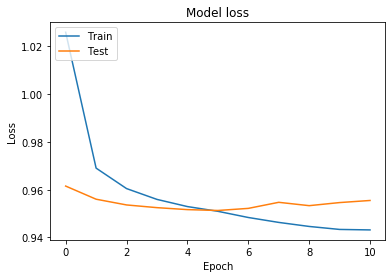

In [19]:
# Plot training & validation loss values
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model selection

Choose model 1 as the final model becasuse it has highest validation accuracy

## Error Analysis

In [20]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [21]:
pred = model_1.predict(valid_data)

In [22]:
y_true = np.argmax(valid_label, axis = 1)
y_pred = np.argmax(pred, axis = 1)

Confusion matrix, without normalization
[[1541  512  491  611]
 [ 458 2532  184  307]
 [ 531  202 1553  563]
 [ 643  431  535 2119]]


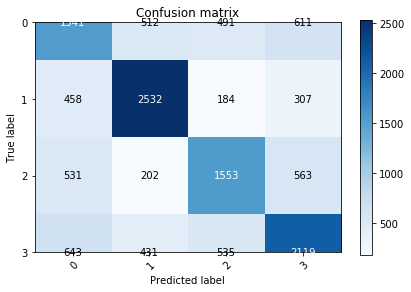

In [23]:
plot_confusion_matrix(y_true = y_true, 
                      y_pred = y_pred, 
                      classes=np.array(["0", "1", "2", "3"]),
                      title='Confusion matrix')
plt.show()

In [45]:
# This code allows you to see the mislabelled examples
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

12581/12581 [==============================] - 0s 19us/step


[1.128836075119824, 0.4690406024456024]